In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp  -r /content/drive/MyDrive/Colab_Notebooks/data/images/image_train /content
print("Ok!")
print("nombre d'images :")
!find /content/image_train/ -name '*.jpg' | wc -l

In [ ]:
!python --version
!find /content/image_train/ -name '*.jpg' | wc -l

In [1]:
import sys
sys.path.append('E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/src')
#sys.path.append('/content/drive/MyDrive/Colab_Notebooks/src')
#!pip install -r /content/drive/MyDrive/Colab_Notebooks/requirements.txt

In [2]:
import configparser
config = configparser.ConfigParser()
config.read('E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/Rakuten_config.ini') 
#config.read('/content/drive/MyDrive/Colab_Notebooks/Rakuten_config_colab.ini')
def get_RACINE_DOSSIER() :
    return config['DOSSIER']['RACINE_DOSSIER']
def get_RACINE_IMAGES() :
    return config['DOSSIER']['RACINE_IMAGES']
print( get_RACINE_DOSSIER())   
print( get_RACINE_IMAGES())   

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/input/
E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/


In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import os
import cv2

In [4]:
# lecture des données sources d'entrainement
df_feats=pd.read_csv(get_RACINE_DOSSIER() + 'X_train_update.csv')

# lecture des données cibles d'entrainement
df_target=pd.read_csv(get_RACINE_DOSSIER() + 'Y_train_CVw08PX.csv')


# création d'un dataframe globale -  jointure
df=df_feats.merge(df_target,on='Unnamed: 0',how='inner')
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
cat=df_target['prdtypecode'].sort_values().unique()
cat
nomenclature=pd.read_csv(get_RACINE_DOSSIER() + 'NOMENCLATURE.csv',header=0,encoding='utf-8',sep=';',index_col=0)
catdict=nomenclature.to_dict()['definition']

In [5]:
df_feats.head(5)

,Unnamed: 0,designation,description,productid,imageid
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [6]:
df_target.head(5)

,Unnamed: 0,prdtypecode
0,0,10
1,1,2280
2,2,50
3,3,1280
4,4,2705


In [7]:
df['nom_image']=df.apply(lambda row: "image_" +  str(row['imageid']) 
                                     + "_product_" + str(row['productid']) + ".jpg",axis=1)
print("Nb enreg ", str(df.shape[0]))
df.head(5)
df_img=df.copy()

Nb enreg  84916


### test de lecture d'images

    Id                                        designation  \
2    2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
31  31                                X-Men 3 - The Movie   
34  34                              The Lord Or Thé Rings   
40  40  Mini Console De Jeux Double Joueurs 8 Bits Con...   
47  47       Shin Masoukishin Panzer Warfare (Import Jap)   

                                          description   productid     imageid  \
2   PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
31                                                NaN    49132716   874730792   
34                                                NaN  4237073471  1324384878   
40  Nom de la marque:NoEnName_Null<br />Affichage ...  4200874030  1316147329   
47                                                NaN     8870838   868167157   

    prdtypecode                                nom_image  
2            50    image_938777978_product_201115110.jpg  
31           40     image_87

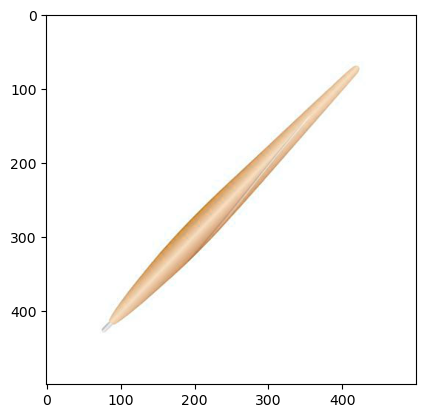

In [8]:
import os
import cv2
import numpy as np

from PIL import Image

# Définir le chemin du dossier contenant les images
#folder_path = "C:\\Users\\MANUADMIN\\python\\DataScience\\Datascientest\\PROJET\\images\\image_train"
folder_path = get_RACINE_IMAGES() 

df_img=df[df['prdtypecode'].isin([40,50,60])]
print(df_img.head())

# Charger les images et les stocker dans un tableau
image_list = []


for filename in df_img['nom_image'][df_img['prdtypecode']==50]:
    #print(os.path.join(folder_path, filename))
    #image = Image.open(os.path.join(folder_path, filename))
    #image.show()
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        image_list.append(img)



# Convertir la liste d'images en un tableau numpy
images = np.array(image_list)
print(len(images))
print(images.shape)


# Afficher la première image
image=images[0,:,:,:]
plt.imshow(image)
plt.show()




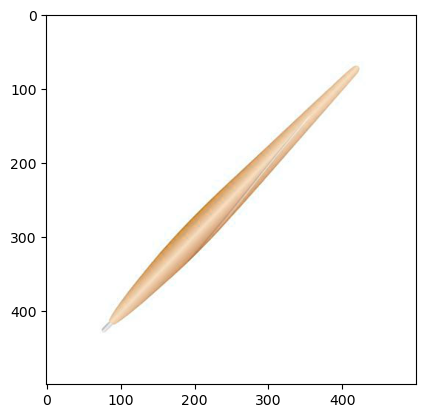

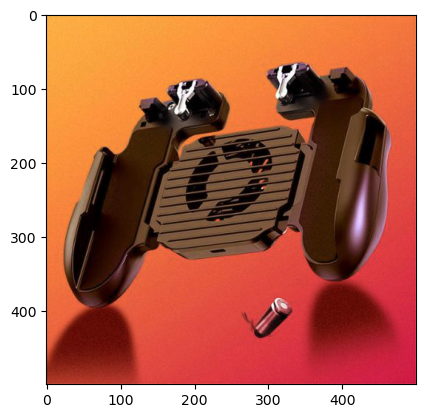

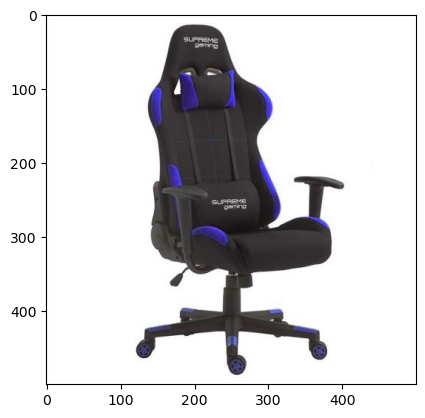

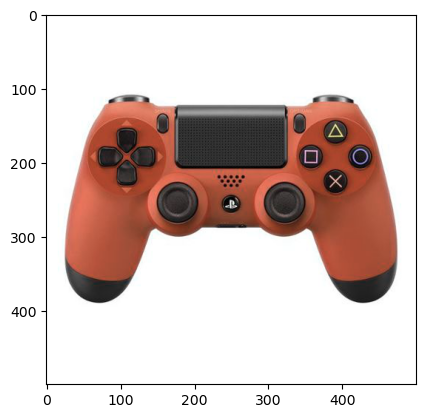

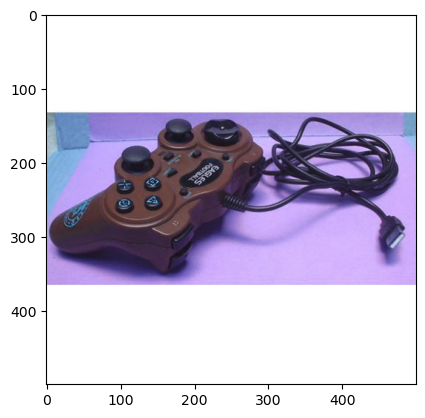

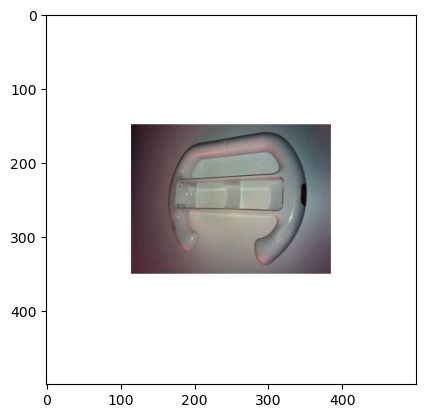

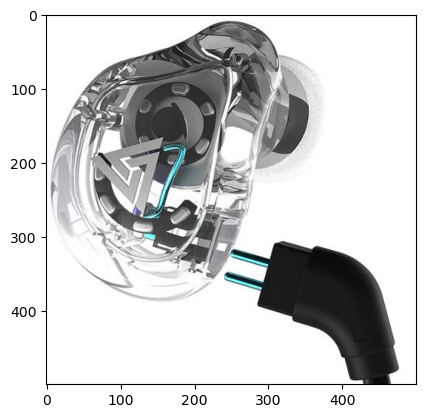

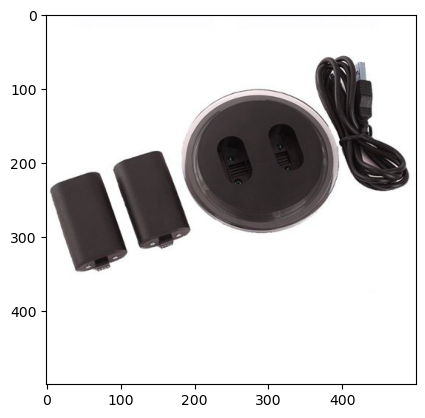

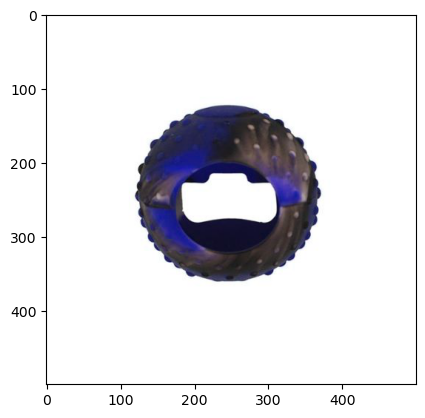

In [9]:
for i in range(9):
    image=images[i,:,:,:]
    plt.imshow(image)
    plt.show()

### test de contours et de formes (NB angles et de cercles)

In [10]:
Dfcontour=pd.DataFrame()
# Définir les classes de formes
classes = {0: 'cercle', 2: 'ligneE', 3: 'triangle', 4: 'rectangle', 5: 'pentagone', 6: 'hexagone'}
for i in range(len(images)):
    image=images[i,:,:,:]
    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Appliquer un filtre pour réduire le bruit de l'image
    gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)
    # Détecter les contours de l'image
    edges = cv2.Canny(gray_blur, 50, 150, apertureSize=3)
    # Extraire les caractéristiques des contours détectés
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shapes = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt, True)
        if perimeter == 0 :
            circularity = 0
        else :    
            circularity = 4 * np.pi * area / perimeter ** 2
        approx = cv2.approxPolyDP(cnt, 0.01 * perimeter, True)
        corners = len(approx)
        shapes.append((corners, circularity))
        """
        for contour in contours:
            # Approximer le contour
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Classer la forme en fonction du nombre de sommets
            num_vertices = len(approx)
            shape = classes.get(num_vertices, "unknown")
            print("Shape: ", shape)
        """                    
    if len(Dfcontour) == 0 :
        Dfcontour =pd.DataFrame(shapes, columns=['corners','circularity'])    
    else:
        Dfcontour = pd.concat([Dfcontour,pd.DataFrame(shapes, columns=['corners','circularity']) ]
                              ,ignore_index=True,axis=0)
print(Dfcontour.head())    
    

C:\Users\shaky\AppData\Local\Temp\ipykernel_23088\1384081982.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Dfcontour = pd.concat([Dfcontour,pd.DataFrame(shapes, columns=['corners','circularity']) ]
C:\Users\shaky\AppData\Local\Temp\ipykernel_23088\1384081982.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Dfcontour = pd.concat([Dfcontour,pd.DataFrame(shapes, columns=['corners','circularity']) ]
C:\Users\shaky\AppData\Local\Temp\ipykernel_23088\1384081982.py:39: FutureWarning: The beh

  corners  circularity
0       4     0.159347
1      16     0.044918
2      11     0.024504
3      14     0.700979
4      12     0.181577


In [11]:
print(Dfcontour.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143109 entries, 0 to 143108
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   corners      143109 non-null  object 
 1   circularity  143109 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB
None


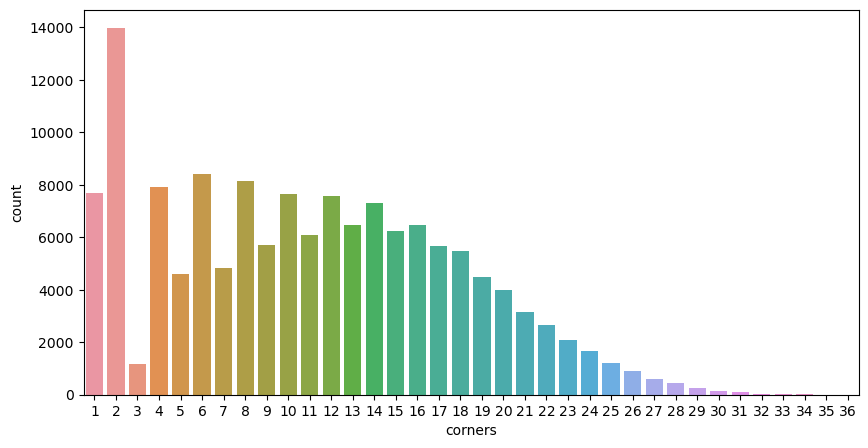

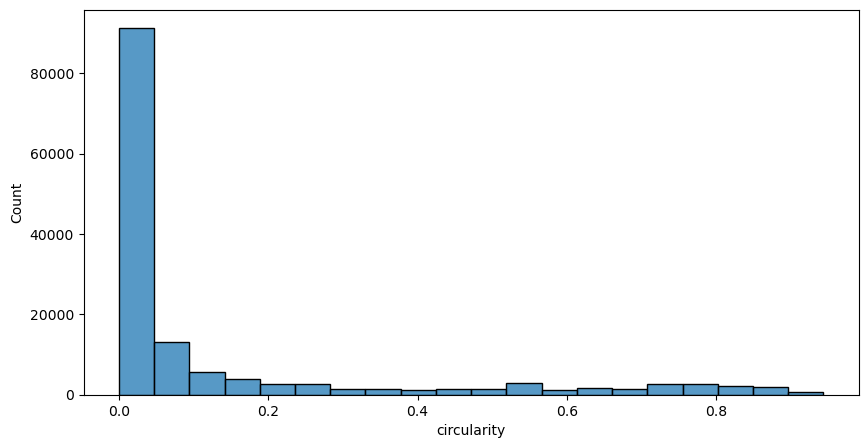

## Dataframe des contours par catégorie

In [ ]:
df_img=df.copy()
Dfcontour=pd.DataFrame([],columns=['prdtypecode','corners','circularity'])
for c in cat:
    print("Catégorie : " , c,catdict[c])
    print("Départ longueur :",Dfcontour.shape)
    image_list=[]
    for filename in df_img[df_img['prdtypecode']==c]['nom_image']:
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            image_list.append(img)
    images = np.array(image_list)
    for i in range(len(images)):
        image=images[i,:,:,:]
        # Convertir l'image en niveaux de gris
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Appliquer un filtre pour réduire le bruit de l'image
        gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)
        # Détecter les contours de l'image
        edges = cv2.Canny(gray_blur, 50, 150, apertureSize=3)
        # Extraire les caractéristiques des contours détectés
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        shapes = []
        for cnt in contours:
            area = cv2.contourArea(cnt)
            perimeter = cv2.arcLength(cnt, True)
            if perimeter == 0 :
                circularity = 0
            else :    
                circularity = 4 * np.pi * area / perimeter ** 2
            approx = cv2.approxPolyDP(cnt, 0.01 * perimeter, True)
            corners = len(approx)
            #print("---------------")
            #print(area,perimeter,circularity,corners)
            shapes.append((c,corners, circularity))
        contient_nan = np.isnan(shapes).any()   
        if len(shapes) != 0 :  
            if len(Dfcontour) == 0 :
                Dfcontour =pd.DataFrame(shapes, columns=['prdtypecode','corners','circularity'])    
            else:
                Dfcontour = pd.concat([Dfcontour,pd.DataFrame(shapes, columns=['prdtypecode','corners','circularity']) ]
                                      ,ignore_index=True,axis=0)
print(Dfcontour.head())    

Catégorie :  10 livres
Départ longueur : (0, 3)


In [24]:
Dfcontour.to_csv('Dfcontour.csv')

In [25]:
Dfcontour= pd.read_csv('Dfcontour.csv')

### Histogramme des angles toutes catagories confonfues

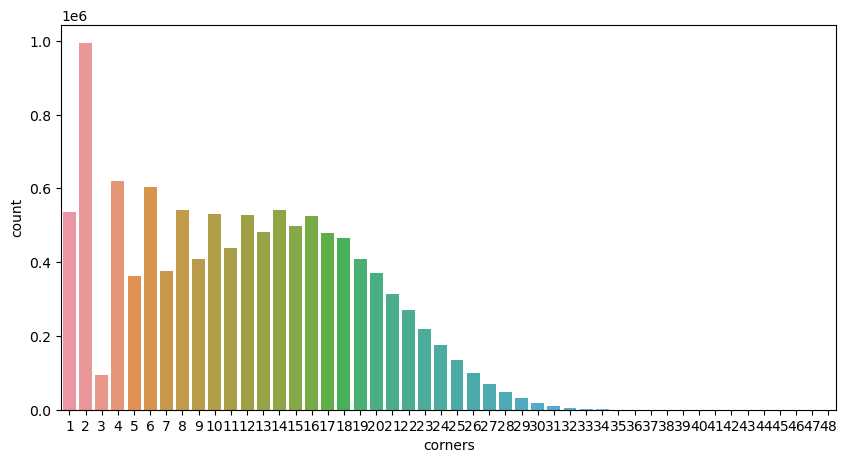

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x=Dfcontour['corners'])
plt.show()

In [ ]:
### Histogramme des circularités toutes catagories confonfues

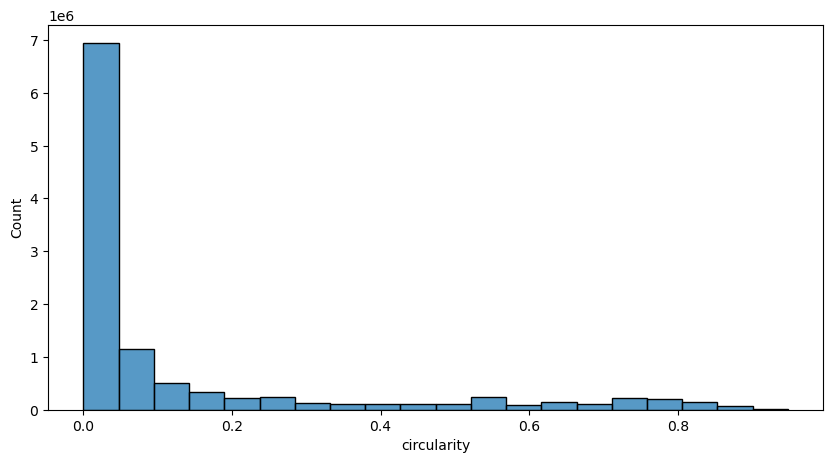

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

# Calculer le maximum et le minimum réels de la colonne, en excluant les infinis
max_value = Dfcontour['circularity'].replace([np.inf, -np.inf], np.nan).max()
min_value = Dfcontour['circularity'].replace([np.inf, -np.inf], np.nan).min()

# Remplacer np.inf par le max réel et -np.inf par le min réel
Dfcontour['circularity'].replace(np.inf, max_value, inplace=True)
Dfcontour['circularity'].replace(-np.inf, min_value, inplace=True)

# Tracer votre histogramme
plt.figure(figsize=(10,5))
sns.histplot(x=Dfcontour['circularity'], bins=20)
plt.show()

In [28]:
Dfcontour.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11198861 entries, 0 to 11198860
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   prdtypecode  int64  
 2   corners      int64  
 3   circularity  float64
dtypes: float64(1), int64(3)
memory usage: 341.8 MB


In [29]:
Dfcontour=pd.read_csv('Dfcontour.csv')
Dfcontour.info()
Dfcontour['prdtypecode'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11198861 entries, 0 to 11198860
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   prdtypecode  int64  
 2   corners      int64  
 3   circularity  float64
dtypes: float64(1), int64(3)
memory usage: 341.8 MB


prdtypecode
2583    999850
2403    993080
2280    982226
2060    879582
1920    678439
1280    664123
1160    588137
1300    587750
40      528089
10      461512
1560    455061
1281    329531
1320    327480
2522    326561
2582    314888
1140    295156
1302    292566
2585    263481
2705    259604
2462    226374
50      143109
2905    120332
2220    107420
1180    104457
1940    100278
60       95973
1301     73802
Name: count, dtype: int64

10 livres
40 jeux video pour pc et consoles
50  accesoires jeux video
60 consoles de jeux video
1140 produits derives “geeks” et figurines
1160 cartes collectionables
1180 figurines collectionables pour jeux de societe
1280 jouets, peluches, poupees
1281 jeux de societe/cartes
1300 Petites voitures (jouets) et maquettes
1301 accesoires pour petis enfants/bebes et mobilier de jeu (flechettes, billard, babyfoot)
1302 jeux d'exterieur
1320 sacs pour femmes et accesore petite enfance
1560 Mobilier et produits decoration/rangement pour la maison
1920 linge de maison (cousins, rideaux, serviettes, nappes, draps)
1940 nouriture (cafes,infusions,conserves, epices,etc)
2060 lampes et accesoires decoration pour maison
2220 accesoires mascots/pets
2280 magazines
2403 livres et bds
2462 consoles de jeux video et jeux videos
2522 produits de papeterie et rangement bureau
2582 mobilier d'exterieur et accesoires (parasols,pots,tentes,etc)
2583 accesoires de piscine
2585 outillage et accesoires pour j

<Figure size 1000x500 with 0 Axes>

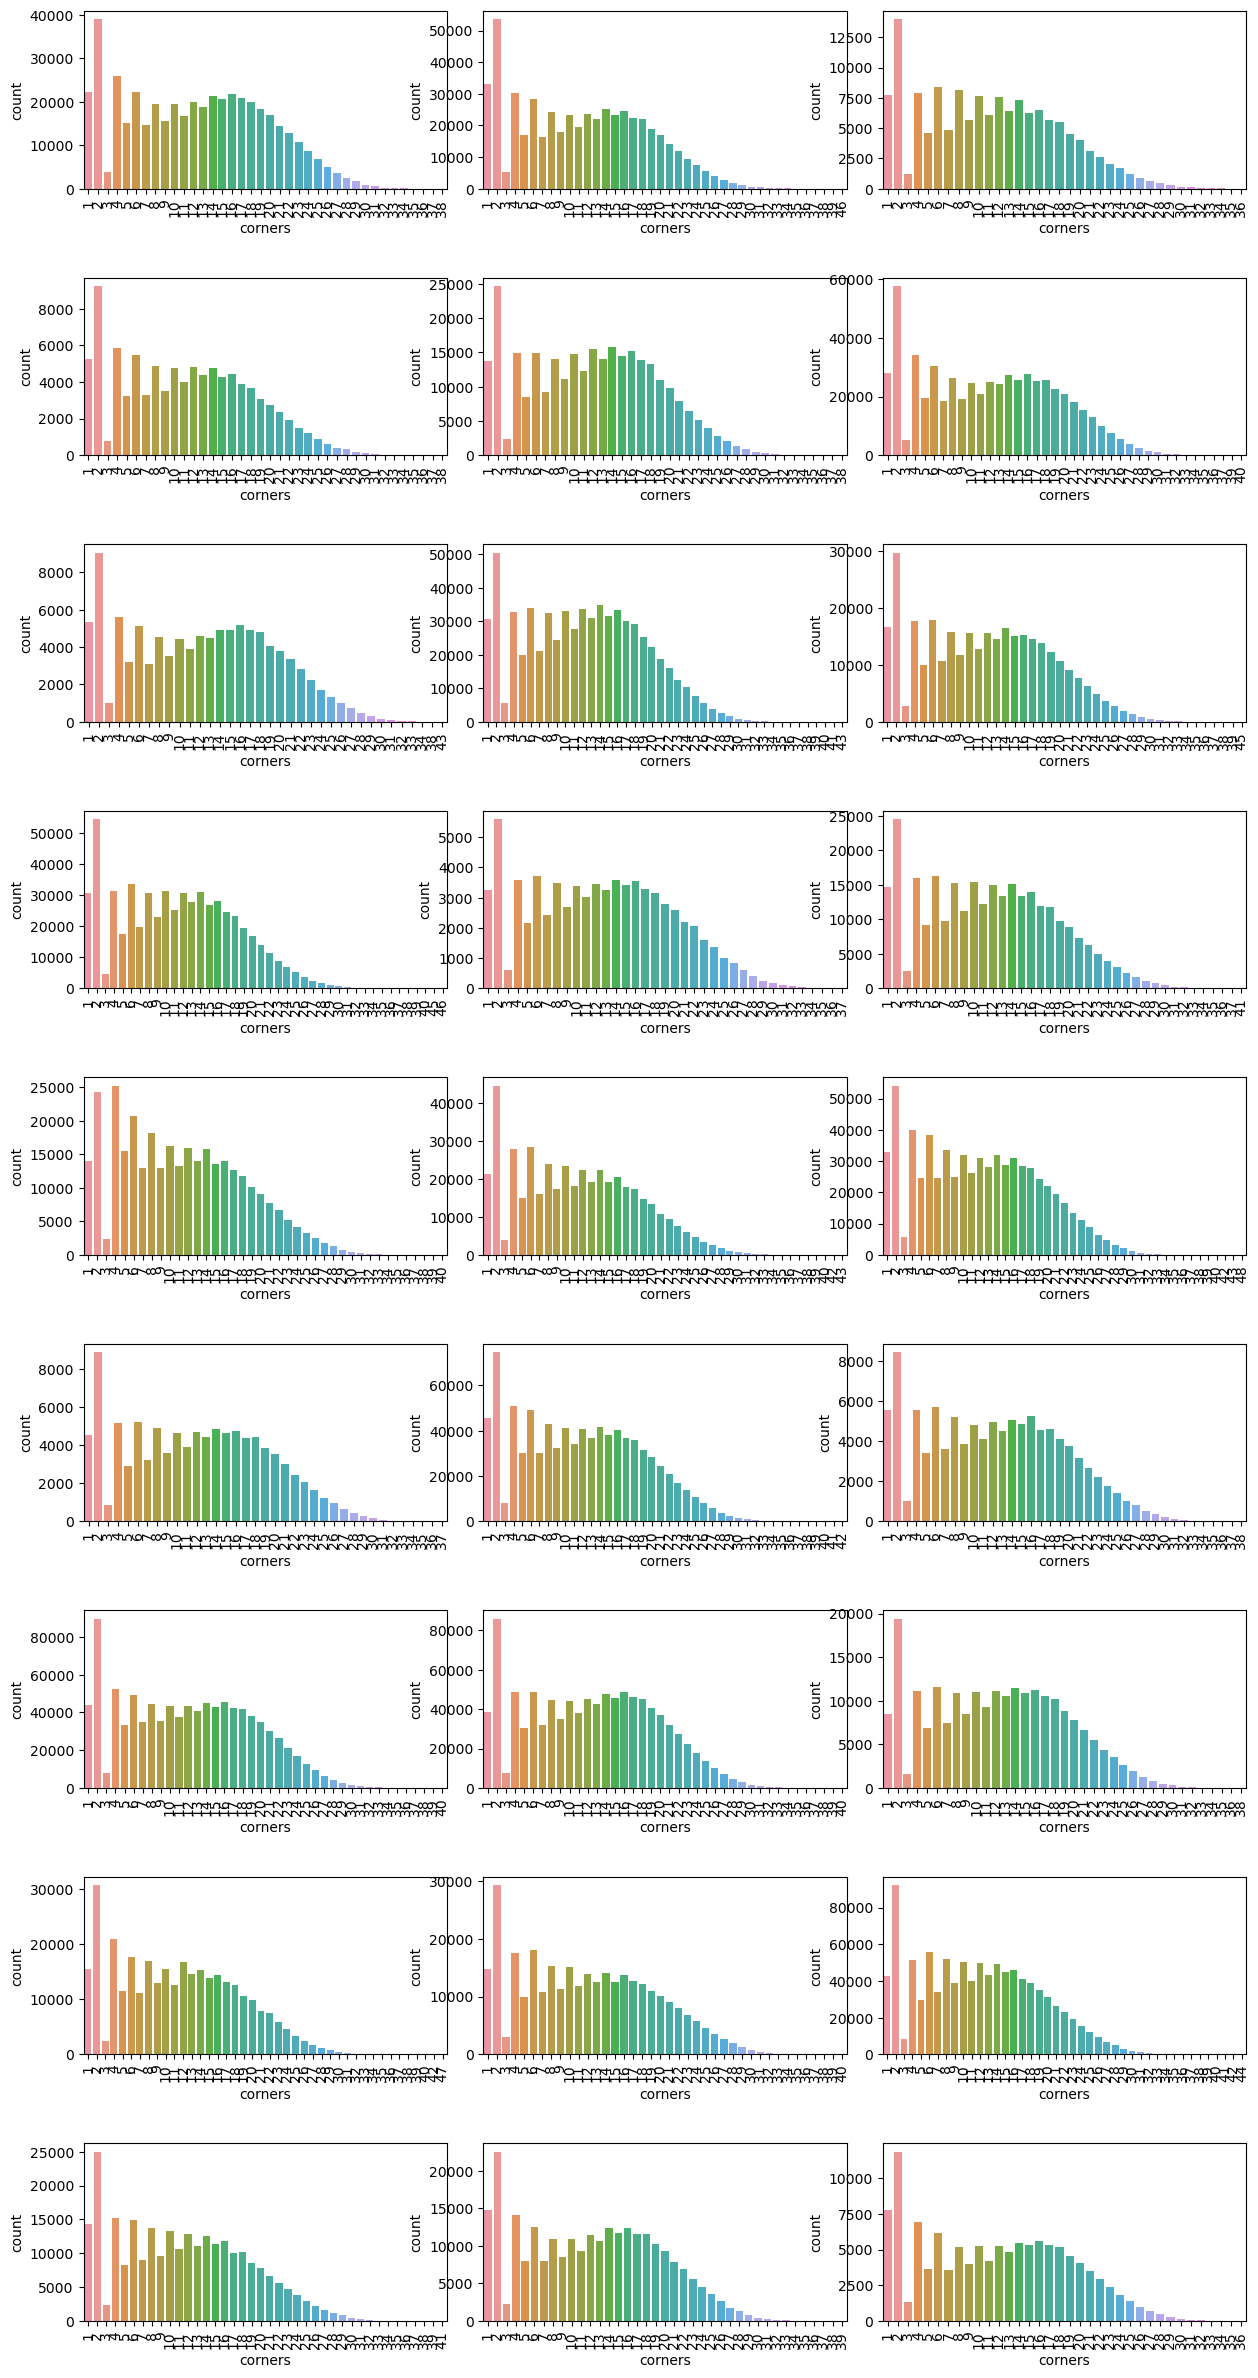

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
fig, axs = plt.subplots(9, 3, figsize=(15,30))
for c,ax in zip(cat,axs.flat):
    print(c,catdict[c])
    sns.countplot(x=Dfcontour[Dfcontour['prdtypecode']==c]['corners'],ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.subplots_adjust( wspace=0.1,hspace=0.5)    
plt.show()

10 livres


<Figure size 1000x500 with 0 Axes>

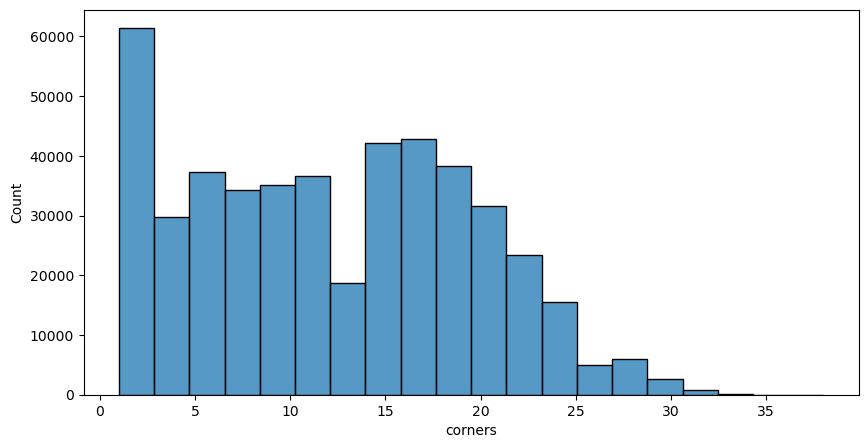

40 jeux video pour pc et consoles


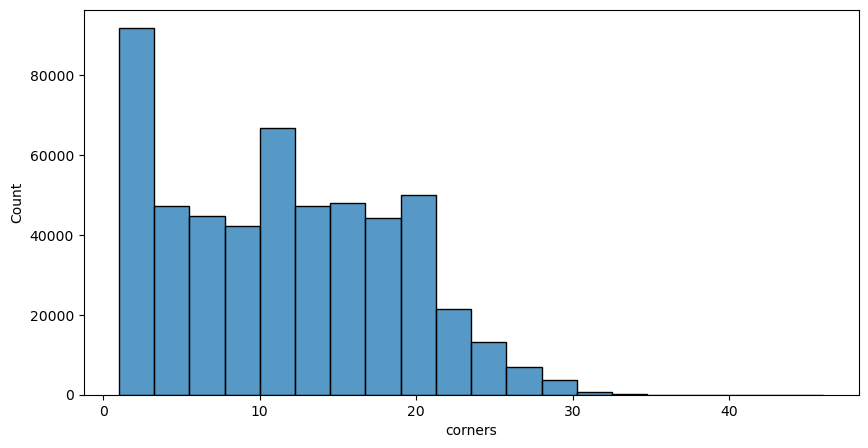

50  accesoires jeux video


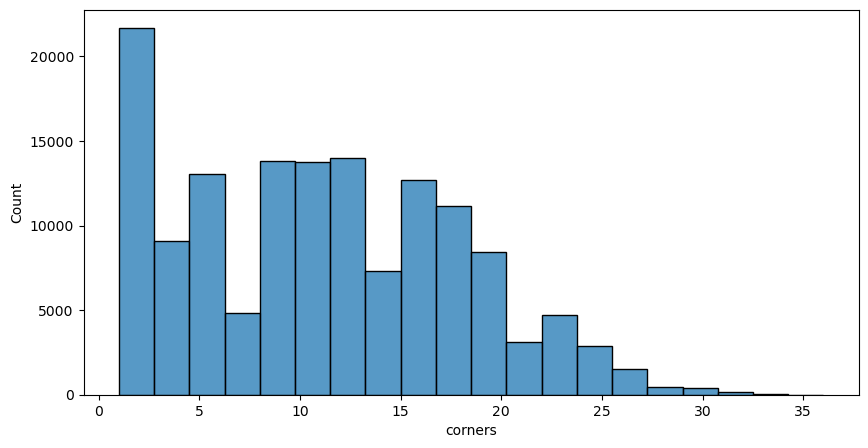

60 consoles de jeux video


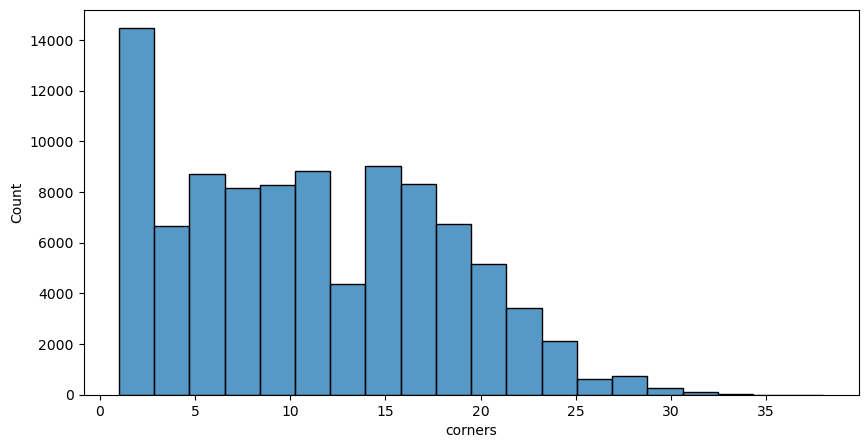

1140 produits derives “geeks” et figurines


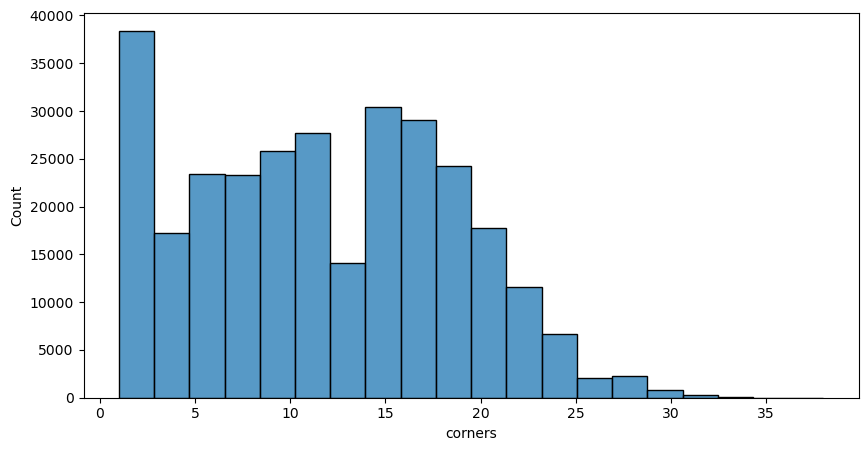

1160 cartes collectionables


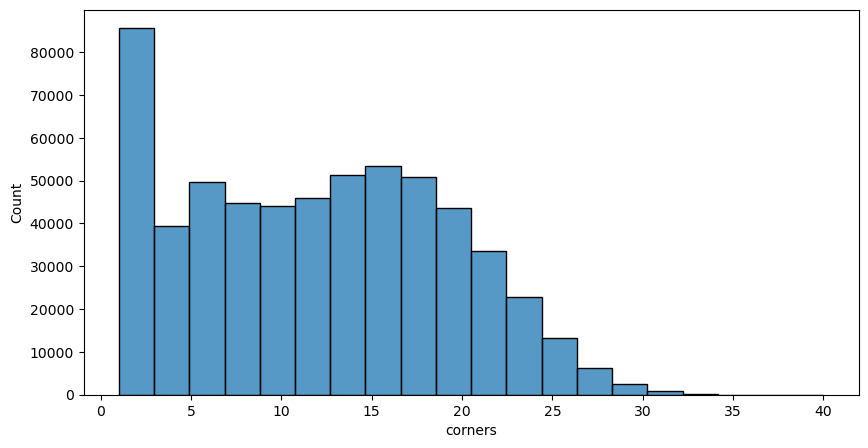

1180 figurines collectionables pour jeux de societe


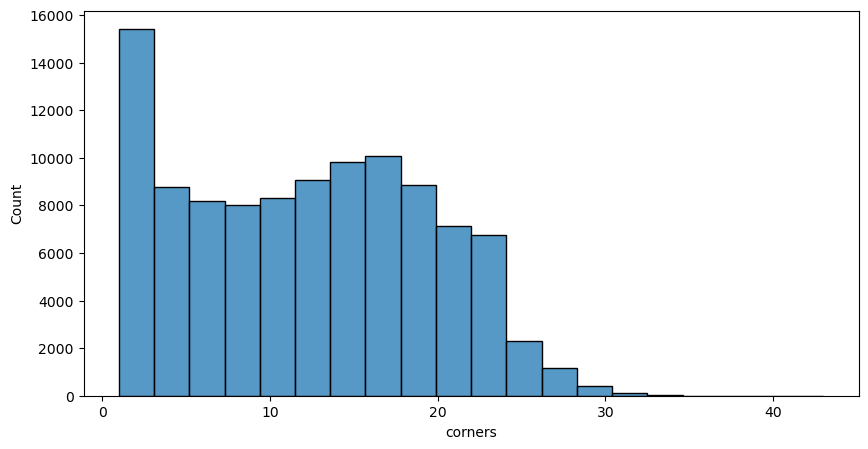

1280 jouets, peluches, poupees


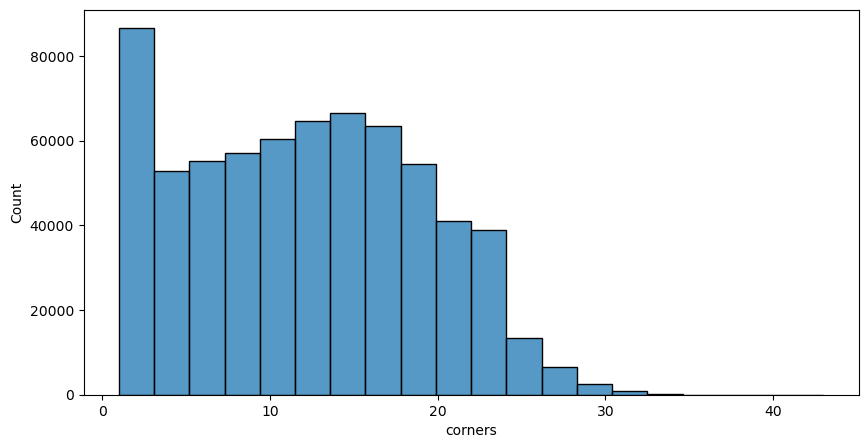

1281 jeux de societe/cartes


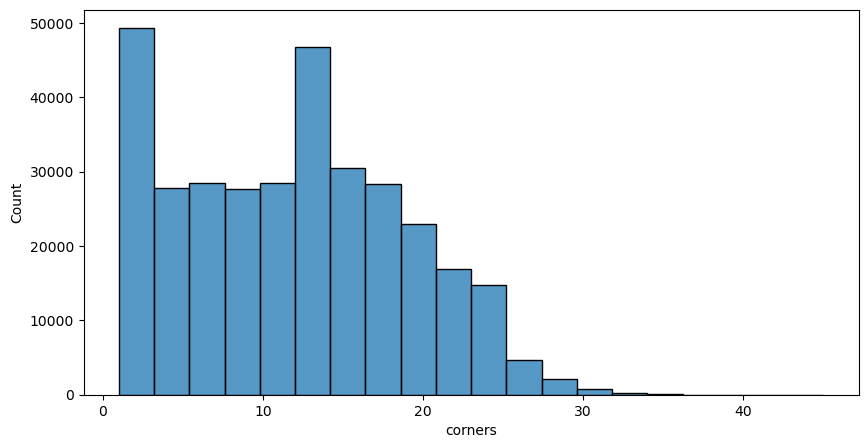

1300 Petites voitures (jouets) et maquettes


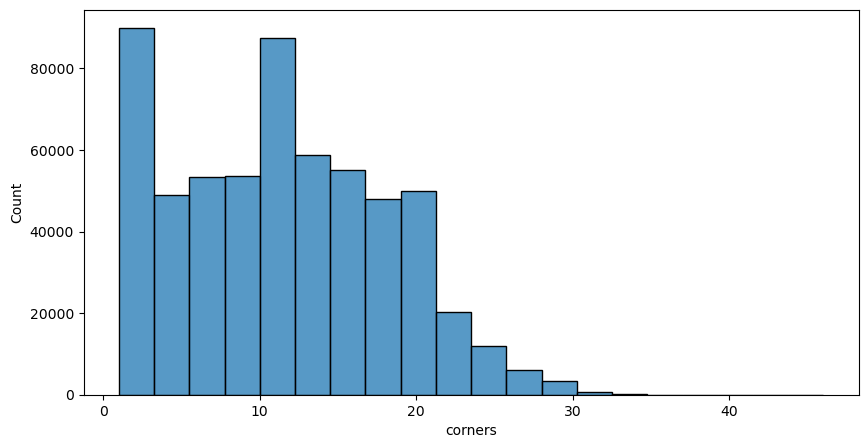

1301 accesoires pour petis enfants/bebes et mobilier de jeu (flechettes, billard, babyfoot)


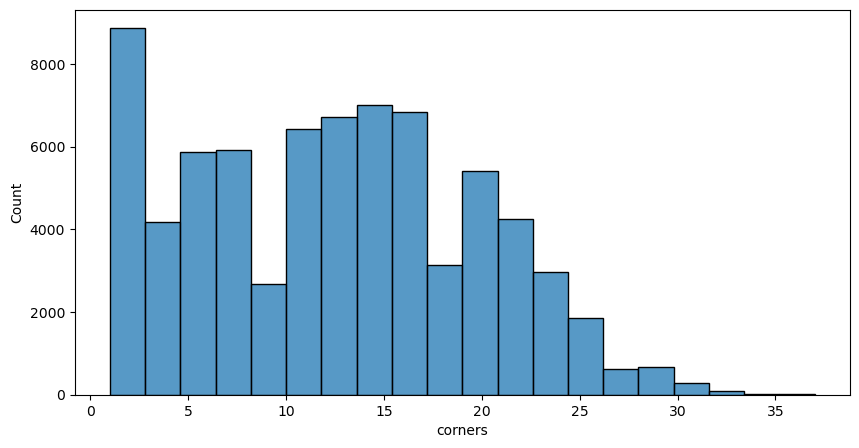

1302 jeux d'exterieur


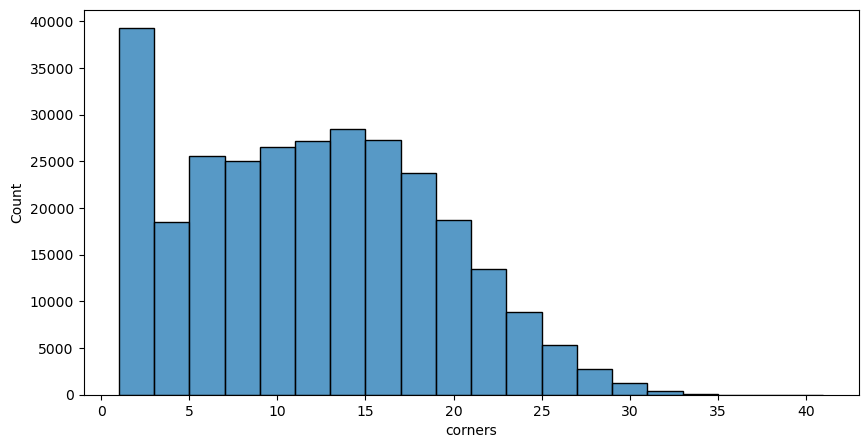

1320 sacs pour femmes et accesore petite enfance


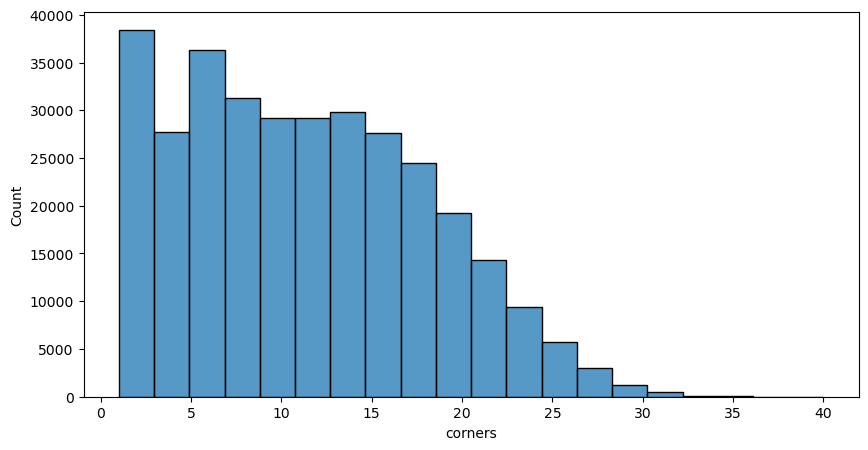

1560 Mobilier et produits decoration/rangement pour la maison


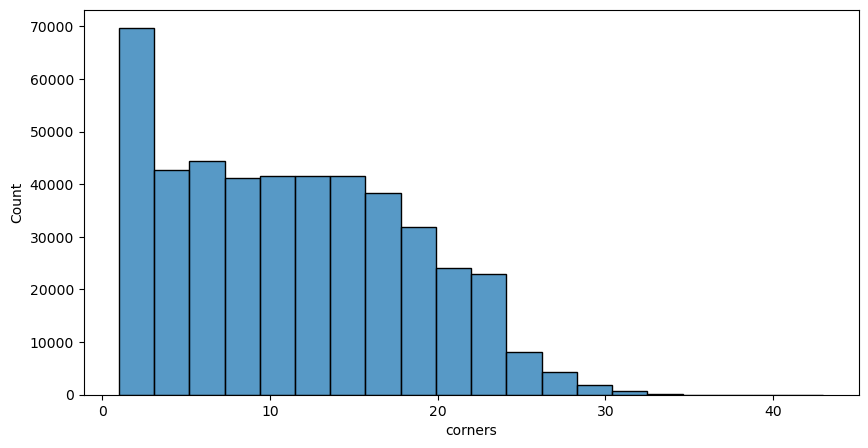

1920 linge de maison (cousins, rideaux, serviettes, nappes, draps)


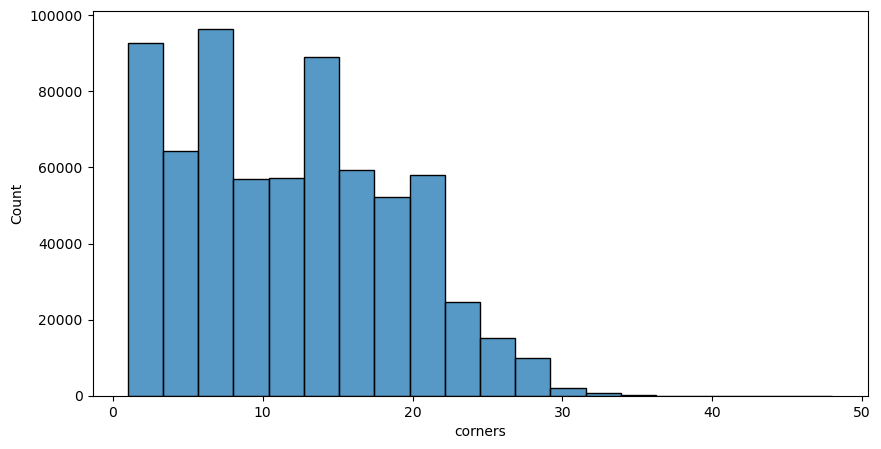

1940 nouriture (cafes,infusions,conserves, epices,etc)


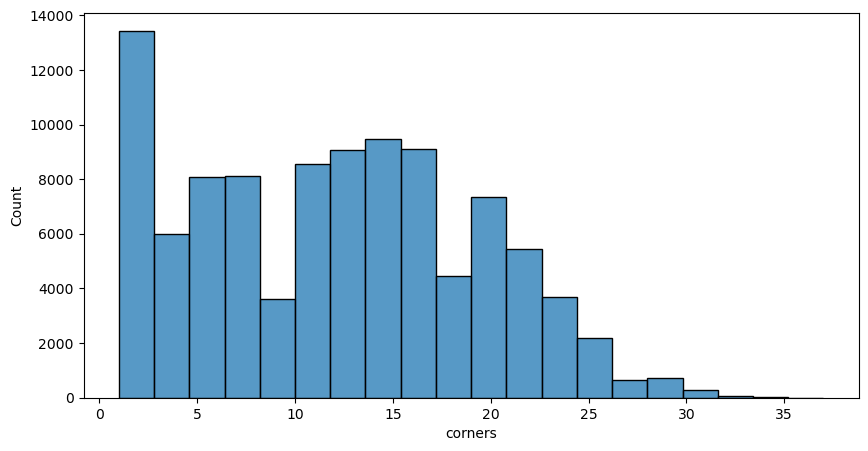

2060 lampes et accesoires decoration pour maison


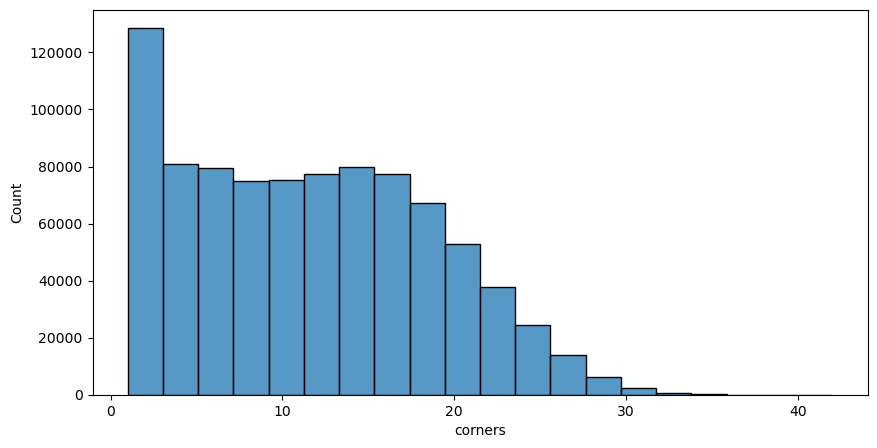

2220 accesoires mascots/pets


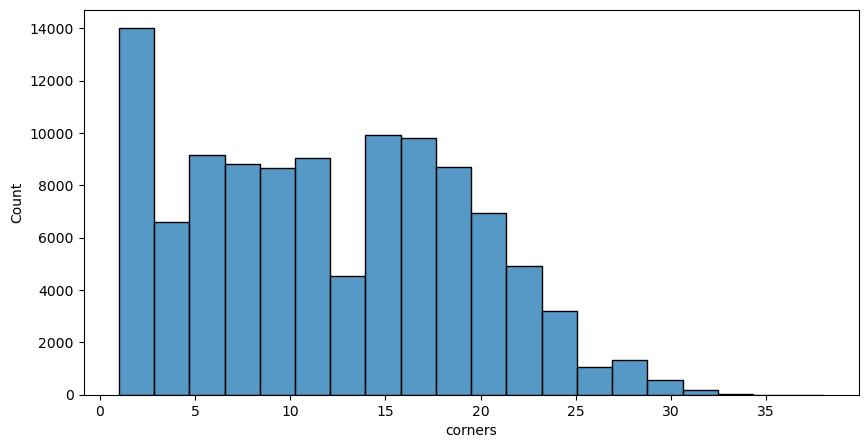

2280 magazines


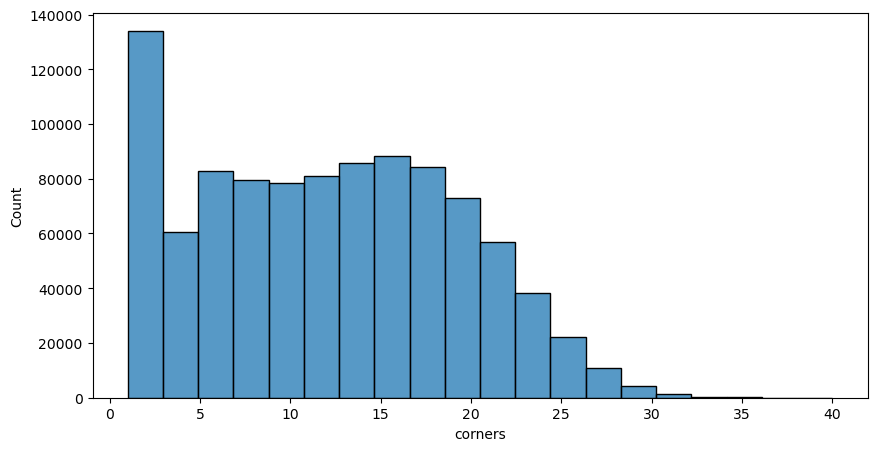

2403 livres et bds


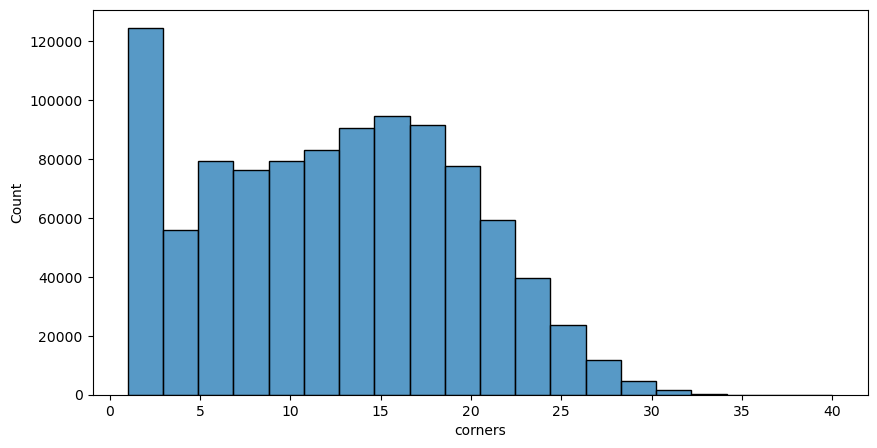

2462 consoles de jeux video et jeux videos


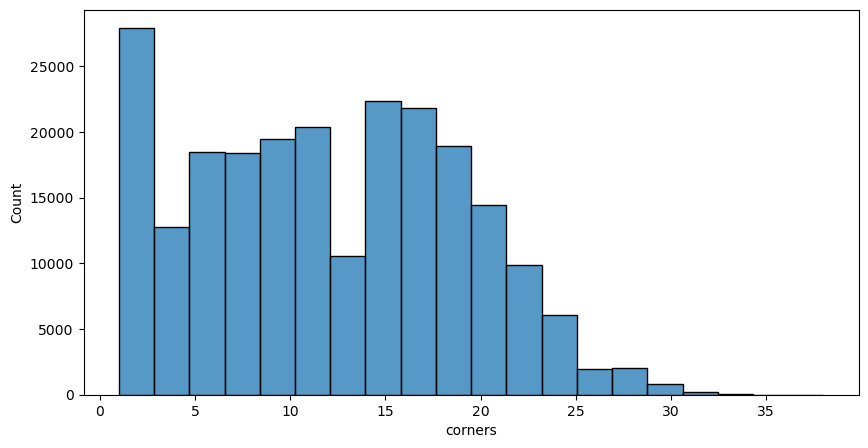

2522 produits de papeterie et rangement bureau


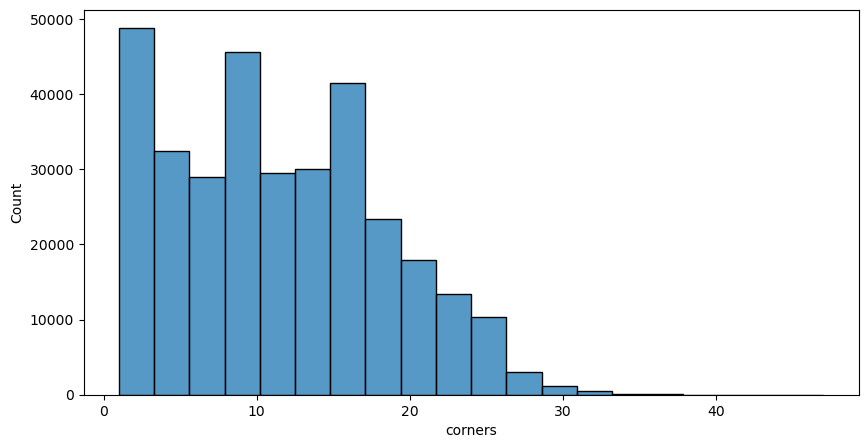

2582 mobilier d'exterieur et accesoires (parasols,pots,tentes,etc)


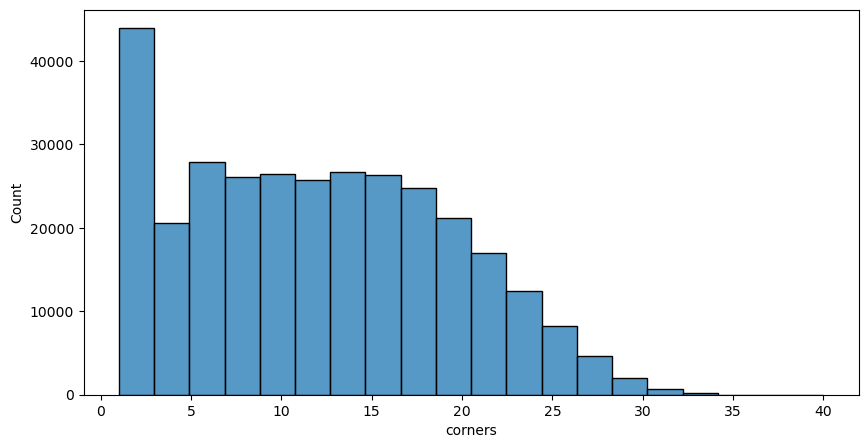

2583 accesoires de piscine


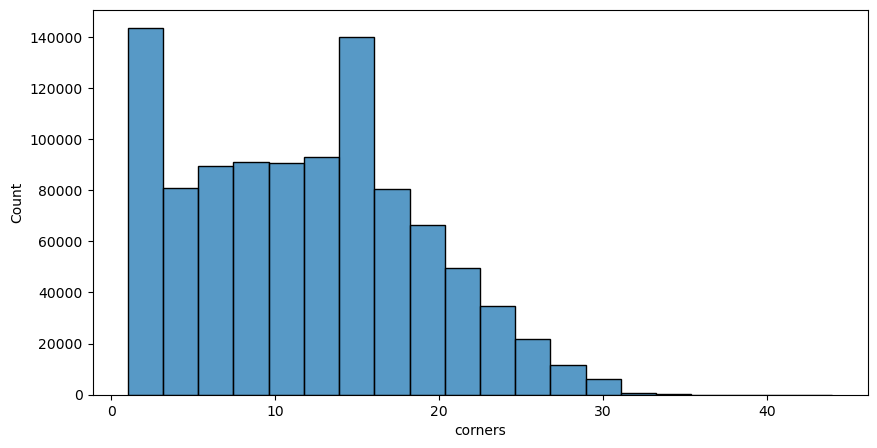

2585 outillage et accesoires pour jardinage


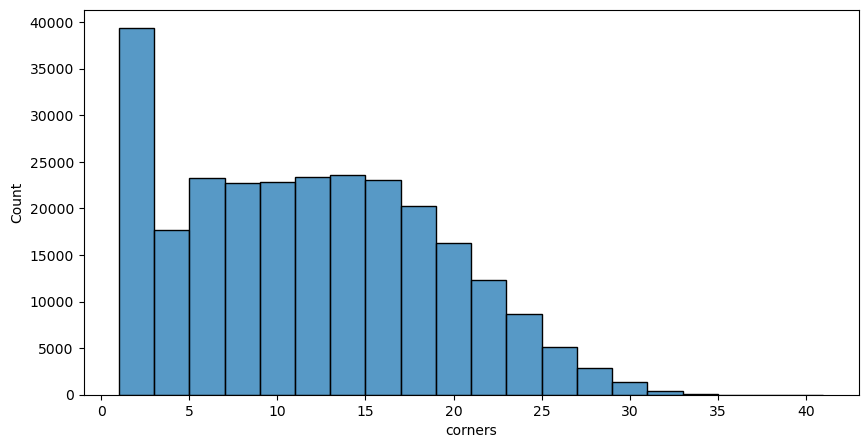

2705 bds et livres


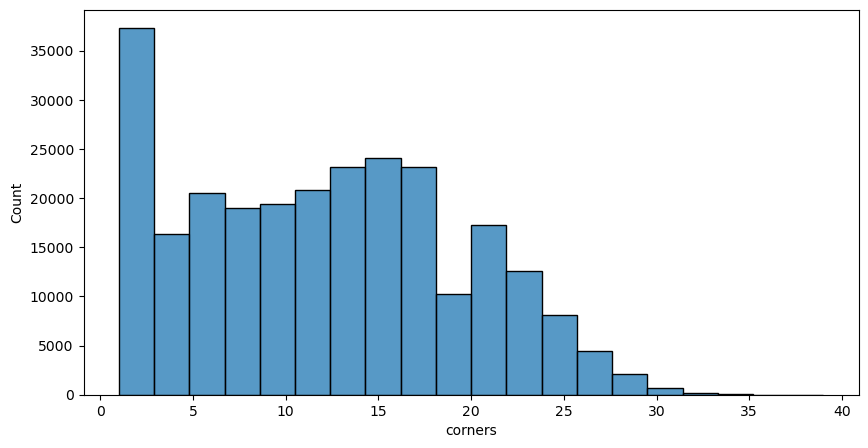

2905 Jeu En téléchargement


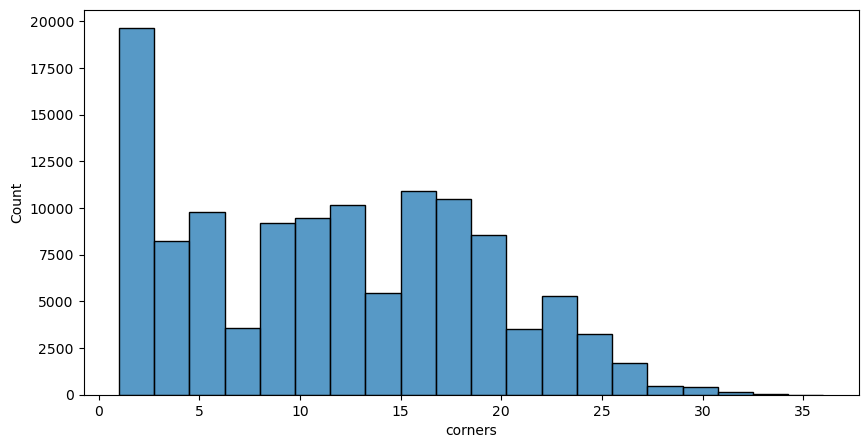

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
for c in cat:
    print(c,catdict[c])
    plt.figure(figsize=(10,5))
    sns.histplot(x=Dfcontour[Dfcontour['prdtypecode']==c]['corners'],bins=20)
    plt.show()